<a href="https://colab.research.google.com/github/ShreyaNavya/LGMVIP--DataScience/blob/main/T3(StckMarkt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [4]:
#Importing Data Set
df = pd.read_csv('Stock.csv')
#df

<Figure size 1440x576 with 0 Axes>

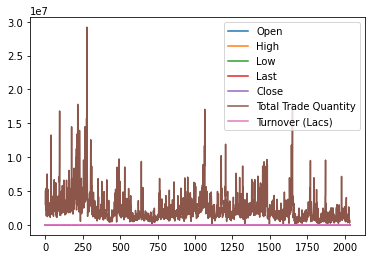

In [5]:
plt.figure(figsize=(20,8))
df.plot()

In [6]:
train_set = df.iloc[:, 1:2].values
train_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [7]:
#Scaling of Data Set.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_training_scaled = scaler.fit_transform(train_set)
features = []
labels = []
for i in range(60, 586):
  features.append(data_training_scaled[i - 60:i, 0])
  labels.append(data_training_scaled[i, 0])
features, labels = np.array(features), np.array(labels)
features = np.reshape(features, (features.shape[0], features.shape[1], 1))
features.shape

(526, 60, 1)

In [8]:
#Building The LSTM
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM


In [10]:
model = Sequential()
model.compile(optimizer='adam', loss='mean_squared_error')
#model.fit(features, labels, epochs=50, batch_size=20)

In [12]:
#Prediction of the Data
df_total = pd.concat((df['Open'], df['Open']), axis=0)
test_inputs = df_total[len(df_total) - len(df) - 60:].values
test_inputs.shape

(2095,)

In [13]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
test_feature = []
for i in range(60, 89):
  test_feature.append(test_inputs[i-60:i, 0])
test_feature = np.array(test_feature)
test_feature = np.reshape(test_feature, (test_feature.shape[0] - test_feature.shape[1], 1))
test_feature.shape

(1740, 1)

In [19]:
predictions = model.predict(test_feature)
#print("Predictions:\n",predictions)

x_train = df[0:1256]
y_train = df[1:1257]
print("x:",x_train.shape)
print("y:",y_train.shape)

#x_train

np.random.seed(1)
np.random.randn(3, 3)

Predictions:
 [[0.20600162]
 [0.21654502]
 [0.21654502]
 ...
 [0.67234385]
 [0.6605839 ]
 [0.64760745]]
x: (1256, 8)
y: (1256, 8)


array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

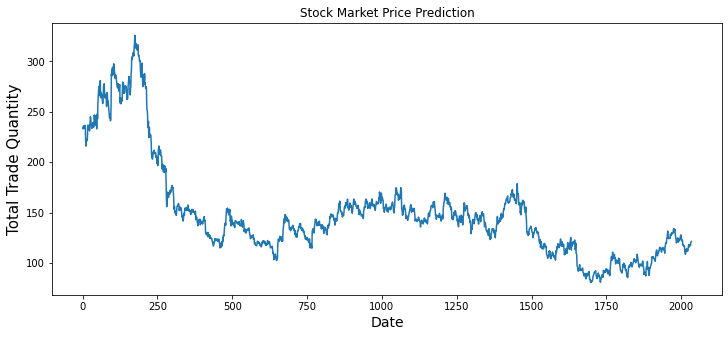

In [23]:
#Ploting Results
plt.figure(figsize=(12,5))
plt.title("Stock Market Price Prediction")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Trade Quantity', fontsize=15)
plt.show()

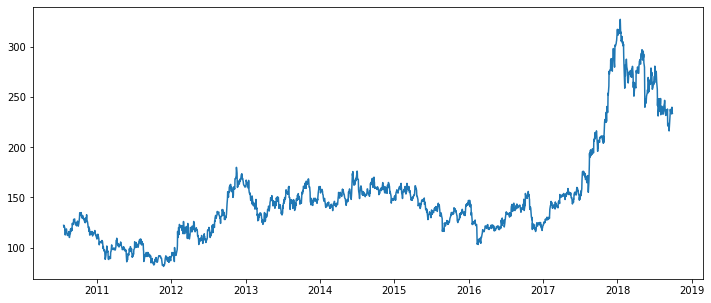

In [25]:
#Analyze the Closing price from the df frame
df["Date"] = pd.to_datetime(df.Date)
df.index = df['Date']

plt.figure(figsize=(12, 5))
plt.plot(df["Open"], label='ClosePriceHist')

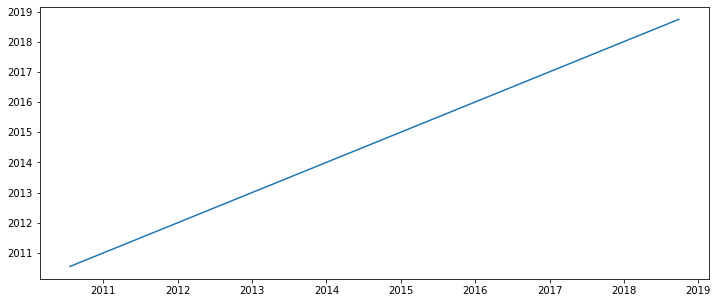

In [31]:
df["Turnover (Lacs)"] = pd.to_datetime(df.Date)
df.index = df['Turnover (Lacs)']
plt.figure(figsize=(12, 5))
plt.plot(df["Turnover (Lacs)"], label='Close_Price_Hist')

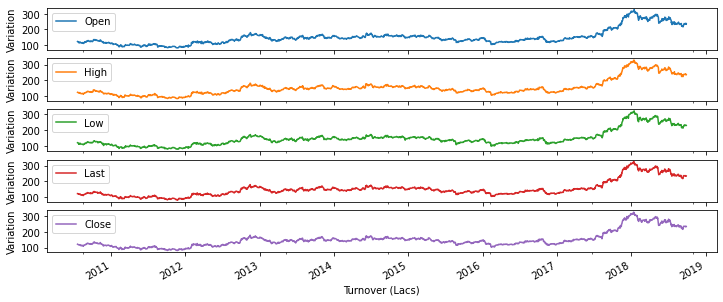

In [33]:
cols = ['Open','High','Low','Last','Close']
axes = df[cols].plot(alpha = 1, figsize=(12, 5), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')